In [90]:
import seaborn as sns
import pandas as pd
import env
import os

In [91]:
def acquire_store():
    
    filename = 'store.csv'
    
    if os.path.exists(filename):
        
        return pd.read_csv(filename)
    
    else:
        
        query = '''
                SELECT sale_date, sale_amount,
                item_brand, item_name, item_price,
                store_address, store_zipcode
                FROM sales
                LEFT JOIN items USING(item_id)
                LEFT JOIN stores USING(store_id)
                '''
        
        url = env.get_connection(db='tsa_item_demand')
        
        df = pd.read_sql(query, url)
        
        df.to_csv(filename, index=False)
        return df

In [92]:
df= acquire_store()
df.head()

,sale_date,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode
0,2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
1,2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2,2013-01-03,14,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
3,2013-01-04,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
4,2013-01-05,10,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253


In [93]:
df.dtypes

sale_date         object
sale_amount        int64
item_brand        object
item_name         object
item_price       float64
store_address     object
store_zipcode      int64
dtype: object

In [94]:
# Set 1 of Exercises

## Convert date column to datetime format.

In [95]:
df['sale_date']= pd.to_datetime(df['sale_date'])
df.head()

,sale_date,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode
0,2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
1,2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2,2013-01-03,14,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
3,2013-01-04,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
4,2013-01-05,10,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253


## Plot the distribution of sale_amount and item_price.

<AxesSubplot:xlabel='sale_amount', ylabel='Count'>

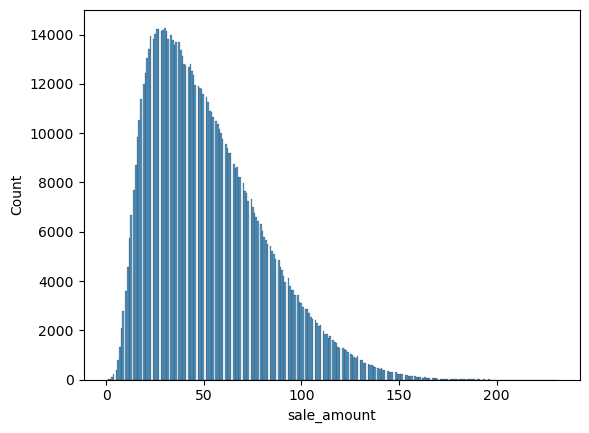

In [96]:
sns.histplot(data= df, x= 'sale_amount')

<AxesSubplot:xlabel='item_price', ylabel='Count'>

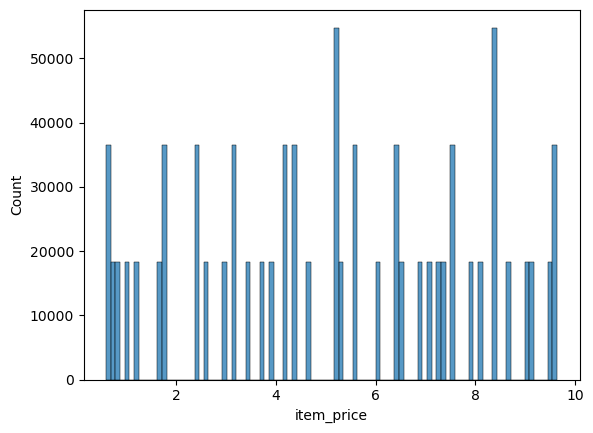

In [97]:
sns.histplot(data= df, x= 'item_price')

## Set the index to be the datetime variable.

In [46]:
df= df.set_index('sale_date')

In [47]:
df.head(1)

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode
sale_date,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253


## Add a 'month' and 'day of week' column to your dataframe.

In [53]:
df['month']= df.index.month_name()
df['day_of_week']= df.index.day_of_week
df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,month,day_of_week
sale_date,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,1
2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,2
2013-01-03,14,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,3
2013-01-04,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,4
2013-01-05,10,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,5


## Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [55]:
df['sales_total']= df.sale_amount * df.item_price
df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,1,10.92
2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,2,9.24
2013-01-03,14,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,3,11.76
2013-01-04,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,4,10.92
2013-01-05,10,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,5,8.40


## Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [56]:
def total_sales(df):
    df['sales_total']= df.sale_amount * df.item_price
    return df

In [57]:
total_sales(df)

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,1,10.92
2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,2,9.24
2013-01-03,14,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,3,11.76
2013-01-04,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,4,10.92
2013-01-05,10,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,5,8.40
...,...,...,...,...,...,...,...,...,...
2017-12-27,63,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,8503 NW Military Hwy,78231,December,2,327.60
2017-12-28,59,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,8503 NW Military Hwy,78231,December,3,306.80
2017-12-29,74,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,8503 NW Military Hwy,78231,December,4,384.80


In [58]:
def day_and_month(df):
    df['month']= df.index.month_name()
    df['day_of_week']= df.index.day_of_week
    return df
df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,1,10.92
2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,2,9.24
2013-01-03,14,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,3,11.76
2013-01-04,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,4,10.92
2013-01-05,10,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,5,8.40


In [98]:
def set_index(df):
    df= df.set_index('sale_date')
    return df
set_index(df)

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode
sale_date,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2013-01-03,14,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2013-01-04,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2013-01-05,10,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
...,...,...,...,...,...,...
2017-12-27,63,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,8503 NW Military Hwy,78231
2017-12-28,59,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,8503 NW Military Hwy,78231
2017-12-29,74,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,8503 NW Military Hwy,78231


# Set 2 of Exercises

## Convert date column to datetime format.

In [85]:
df= pd.read_csv('OPSD.csv')
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


## Plot the distribution of each of your variables.

## Set the index to be the datetime variable.

In [63]:
df.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [86]:
df['date']= pd.to_datetime(df['Date'])

In [87]:
df= df.set_index('Date')

## Add a month and a year column to your dataframe.

In [75]:
df

,Consumption,Wind,Solar,Wind+Solar,date
Date,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,2006-01-01
2006-01-02,1380.52100,NaN,NaN,NaN,2006-01-02
2006-01-03,1442.53300,NaN,NaN,NaN,2006-01-03
2006-01-04,1457.21700,NaN,NaN,NaN,2006-01-04
2006-01-05,1477.13100,NaN,NaN,NaN,2006-01-05
...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017-12-27
2017-12-28,1299.86398,506.424,14.162,520.586,2017-12-28
2017-12-29,1295.08753,584.277,29.854,614.131,2017-12-29


In [89]:
df['month']= df.index.month_name()

AttributeError: 'Index' object has no attribute 'month_name'

## Fill any missing values.

## Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.